# Tutorial 2

## Modulation and Matched-Filter Receiver

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np  # make the numpy package available and use 'np' as alias
import matplotlib.pyplot as plt  # plotting library
import cmath
%matplotlib inline
YOUR_CODE_HERE = None  # placeholder

### Exercise 1
Implement a BPSK modulator

#### a) Generate random bits
Generate 42 random bits with equal probability for a 0 or a 1.  Use `numpy.random.choice` for this!

In [ ]:
nbits = 42
bits = YOUR_CODE_HERE

# solution
bits = np.random.choice([0, 1], nbits)

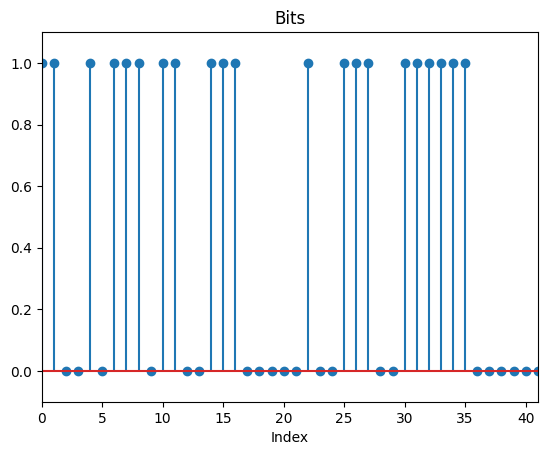

In [ ]:
plt.stem(bits)
plt.title("Bits")
plt.xlabel("Index")
plt.margins(y=0.1, x=0);

#### b) Convert bits to BPSK symbols
Assign the bits in the following way: logical 0 -> -1, logical 1 -> 1

In [ ]:
symbols = YOUR_CODE_HERE

# solution
mapping_table = np.array([-1, 1])
symbols = mapping_table[bits]

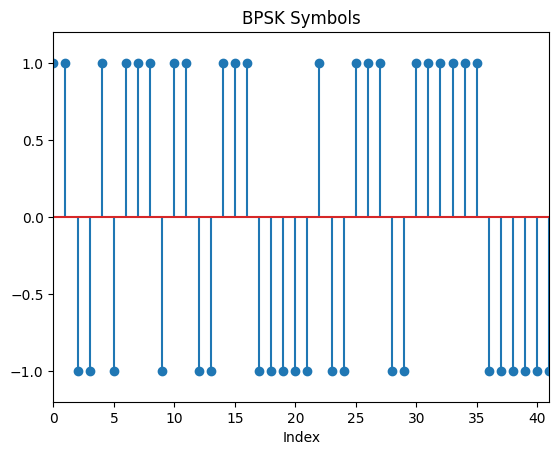

In [ ]:
plt.stem(symbols)
plt.title("BPSK Symbols")
plt.xlabel("Index")
plt.margins(y=0.1, x=0);

#### c) Pulse shaping
Use the given RRC-filter for the pulse shaping

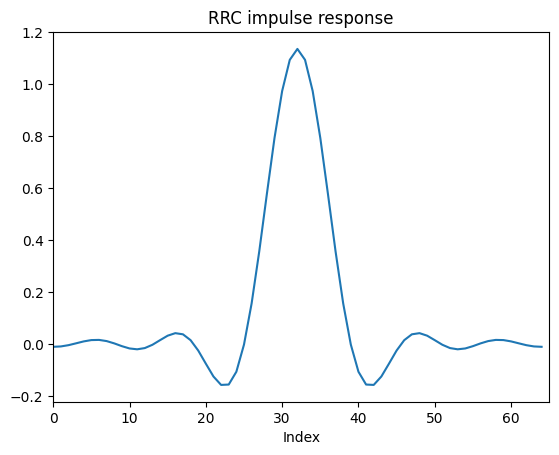

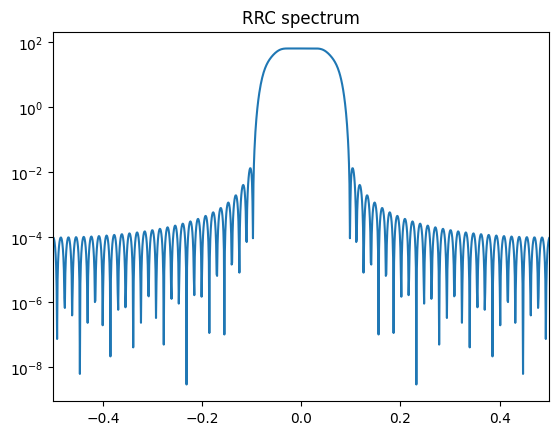

In [ ]:
#import sys
#sys.path.append('/content/drive/MyDrive/Colab Notebooks')

import rrc # requires rrc.py to be accessible (e.g., in the same directory)
sps = 8  # samples per symbol
K = 8  # length of the impulse response in symbols
rho = 0.5  # RRC rolloff factor
g = rrc.get_rrc_ir(K * sps + 1, sps, 1, rho)  # RRC impulse response

plt.plot(g)
plt.title("RRC impulse response")
plt.xlabel("Index")
plt.xlim(0, K * sps + 1)

plt.figure()
nfft = 1024
f = np.linspace(-0.5, 0.5, nfft)
G = (np.abs(np.fft.fftshift(np.fft.fft(np.concatenate((g, np.zeros(nfft-g.size)))))))**2
plt.semilogy(f, G)
plt.title("RRC spectrum")
plt.xlim(-0.5, 0.5);

In [ ]:
s_BB = YOUR_CODE_HERE

# solution -  simple implementation of s_BB(t) = sum(s[n] * g(t-nT))
s_BB = np.zeros(symbols.size * sps + g.size - 1)
for i in range(symbols.size):
    s_BB[i * sps: i * sps + g.size] += symbols[i] * g

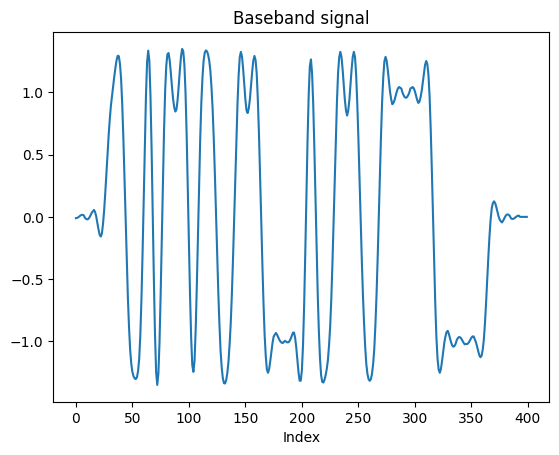

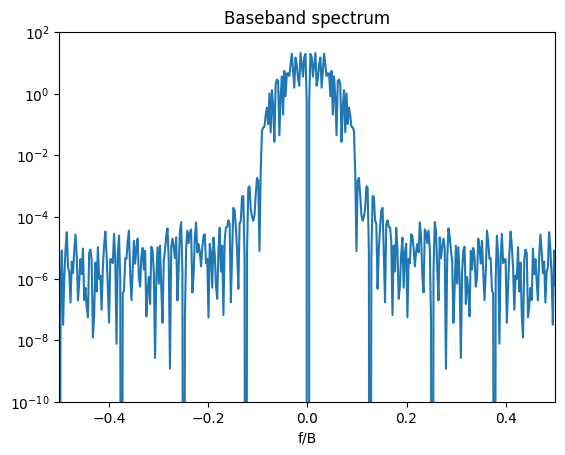

In [ ]:
plt.plot(s_BB)
plt.title("Baseband signal")
plt.xlabel("Index")

plt.figure()
f = np.linspace(-0.5, 0.5, s_BB.size)
S_BB = np.abs(np.fft.fftshift(np.fft.fft(s_BB)))**2/s_BB.size
plt.semilogy(f, S_BB)
plt.xlim(-0.5, 0.5)
plt.ylim(1e-10, 100)
plt.xlabel("f/B")
plt.title("Baseband spectrum");

#### d) Theoretical questions
1. How does your choice of `K` affect the spectrum and why?  
2. Which pros and cons does a large `K` offer?
3. What effect does the choice of `sps` have on the spectrum and why?

#### Answers:
1.Due to the larger observation interval, less energy from the (infinitely extended) edge areas is neglected. This approximates the optimal spectrum better. The limitation can be interpreted as windowing with a square pulse and accordingly in the frequency range as convolution with a sinc. At the limit for `K` towards infinity, the sinc becomes a Dirac and the spectrum corresponds to the desired pulse spectrum.
2.Advantage:Better approximation of the desired spectrum; Disadvantage: increased computational effort due to convolution / correlation and increased latency.

3.Higher "visible" bandwidth, less aliasing of the spectral repetitions.

### Exercise 2
Implement a Matched-filter receiver for the BPSK modulator you created in exercise 1!

#### a) Determine the Matched-filter for the modulator from question 1!

In [ ]:
g_MF = YOUR_CODE_HERE

# solution
g_MF = g

#### b) Apply the matched filter to the Baseband signal `s_BB`!

In [ ]:
y = YOUR_CODE_HERE

# solution
y = np.convolve(g_MF, s_BB)

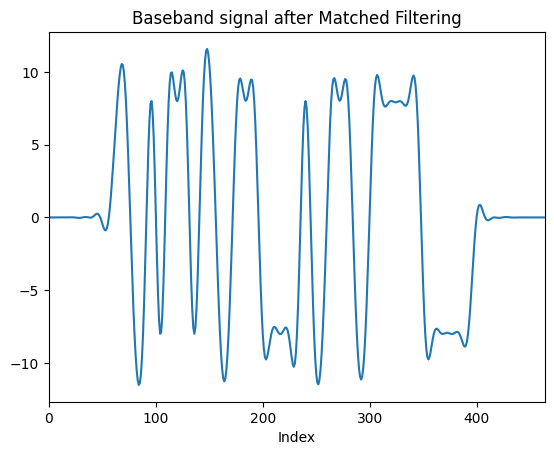

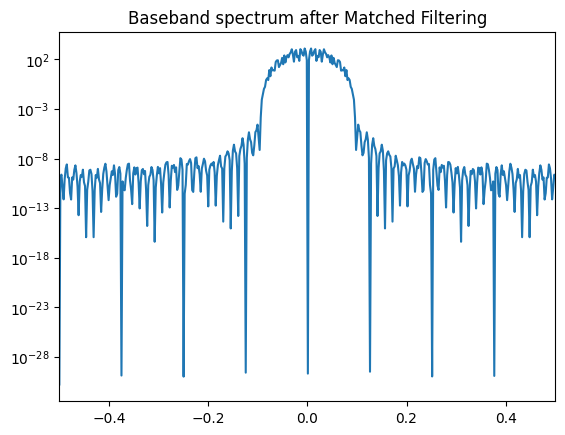

In [ ]:
plt.plot(y)
plt.title("Baseband signal after Matched Filtering")
plt.xlabel("Index")
plt.xlim(0, y.size)

plt.figure()
f = np.linspace(-0.5, 0.5, y.size)
Y = np.abs(np.fft.fftshift(np.fft.fft(y)))**2/y.size
plt.semilogy(f, Y)
plt.xlim(-0.5, 0.5)
plt.title("Baseband spectrum after Matched Filtering");

#### c) In order to reconstruct the BPSK symbols, sample `y`.  *Note*:  Look at the initial delay

In [ ]:
recv_symbols = YOUR_CODE_HERE

# solution

tau = 2 * (g.size - 1) // 2   # group delays introduced by pulse shaping and matched filtering
recv_symbols = y[tau: -tau: sps]

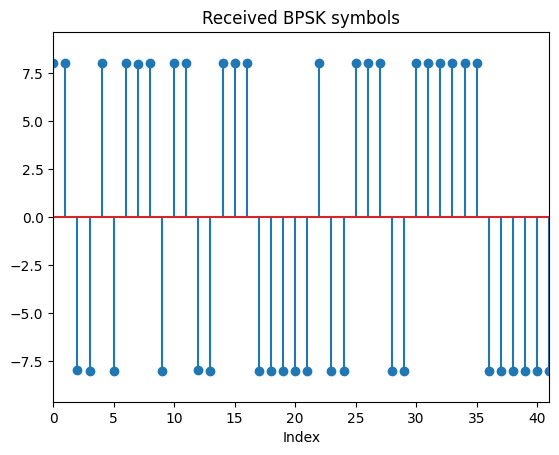

In [ ]:
plt.stem(recv_symbols)
plt.title("Received BPSK symbols")
plt.margins(y=0.1, x=0)
plt.xlabel("Index");

#### d) Reconstruct the transmitted bitstream!

In [ ]:
recv_bits = YOUR_CODE_HERE

# solution
recv_bits = [0 if sym < 0 else 1 for sym in recv_symbols]

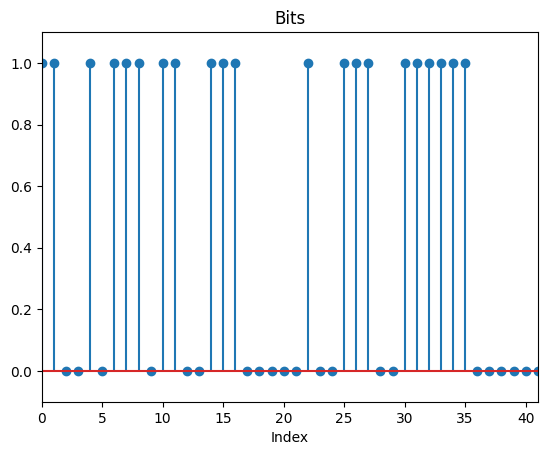

In [ ]:
plt.stem(recv_bits)
plt.title("Bits")
plt.xlabel("Index")
plt.margins(y=0.1, x=0);

In [ ]:
if (recv_bits == bits).all():
    print("Transmission successful!")
else:
    print("Error(s) occurred!")

Transmission successful!


### Theoretical questions
1. What causes the delay in the filtered baseband signal?  
2. What effect would a receiver filter that is not "matched" have?

### Answers
1. The group delay caused by the receiver and transmitter filters
2. This estimation of the transmitted symbol will be worse and the probability of errors occurring increases.

